<a href="https://colab.research.google.com/github/quantbrasil/youtube/blob/master/src/005_Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo Overfitting e Underfitting em Machine Learning

## Objetivos de Aprendizado
- Entender os conceitos de **overfitting** e **underfitting**
- Aprender a identificar esses problemas através de métricas de desempenho do modelo
- Visualizar como diferentes modelos se ajustam aos mesmos dados
- Entender o trade-off entre viés e variância em machine learning
- Aplicar esses conceitos à modelagem de dados financeiros

## 1. Introdução aos Problemas de Ajuste de Modelos

Ao construir modelos de machine learning, precisamos equilibrar dois objetivos concorrentes:
1. Criar um modelo que capture com precisão os padrões nos nossos dados de treinamento
2. Garantir que o modelo generalize bem para dados novos e não vistos

Isso leva a três cenários comuns:

- **Underfitting (Subajuste)**: O modelo é muito simples para capturar o padrão subjacente nos dados
- **Good fit**: O modelo captura o padrão subjacente sem se ajustar ao ruído
- **Overfitting (Sobreajuste)**: O modelo é muito complexo e captura o ruído nos dados de treinamento

## 2. Configurando Nosso Ambiente

Vamos primeiro importar as bibliotecas necessárias:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Set the plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

## 3. Gerando Dados Sintéticos

Para esta demonstração, vamos criar um conjunto de dados sintéticos seguindo uma relação quadrática (y = 3 - 0.5x + 0.2x² + ruído). Isso nos permitirá conhecer o padrão subjacente verdadeiro e observar claramente os problemas de ajuste.

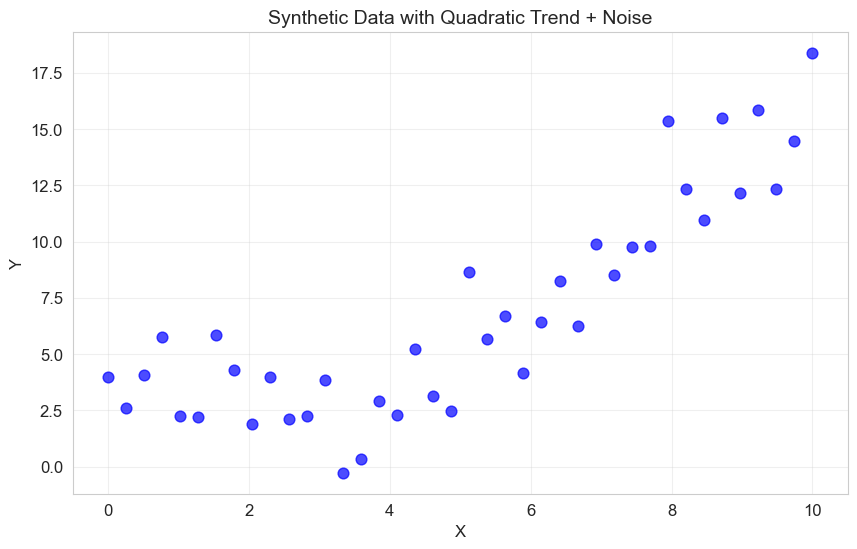

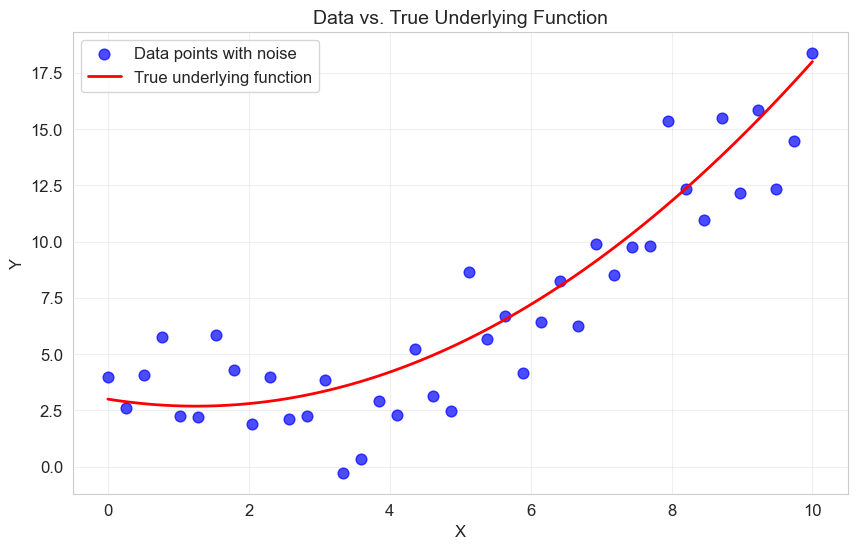

In [12]:
# Generate synthetic data with a quadratic trend and some noise
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 40).reshape(-1, 1)  # Input features
y = 3 - 0.5 * X + 0.2 * X**2 + np.random.normal(loc=0, scale=2, size=X.shape)  # Target with noise

# Plot the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=60, alpha=0.7)
plt.title('Synthetic Data with Quadratic Trend + Noise', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Display the true function without noise
X_smooth = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = 3 - 0.5 * X_smooth + 0.2 * X_smooth**2

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=60, alpha=0.7, label='Data points with noise')
plt.plot(X_smooth, y_true, 'r-', linewidth=2, label='True underlying function')
plt.title('Data vs. True Underlying Function', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 4. Divisão Treino-Teste: Por Que É Essencial

Para avaliar adequadamente nossos modelos, precisamos dividir nossos dados em:
- Conjunto de treinamento: Usado para ajustar o modelo
- Conjunto de teste: Usado para avaliar o quão bem o modelo generaliza

Esta separação é crucial para detectar overfitting—modelos que performam bem nos dados de treinamento, mas mal em novos dados.

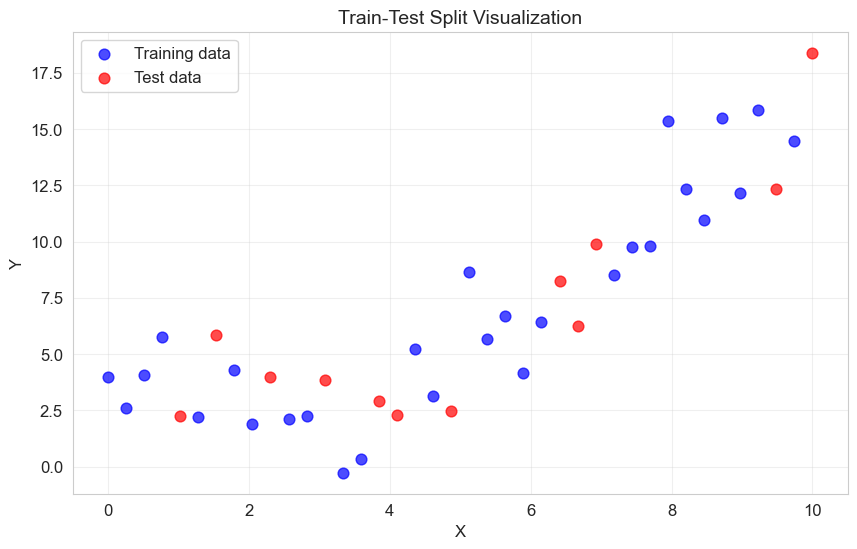

In [13]:
# Split the data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the split
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', s=60, alpha=0.7, label='Training data')
plt.scatter(X_test, y_test, color='red', s=60, alpha=0.7, label='Test data')
plt.title('Train-Test Split Visualization', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 5. Entendendo o Underfitting

**Underfitting** ocorre quando nosso modelo é muito simples para capturar o padrão subjacente nos dados. Vamos ver isso com um modelo linear (grau 1) quando nossos dados têm uma relação quadrática.

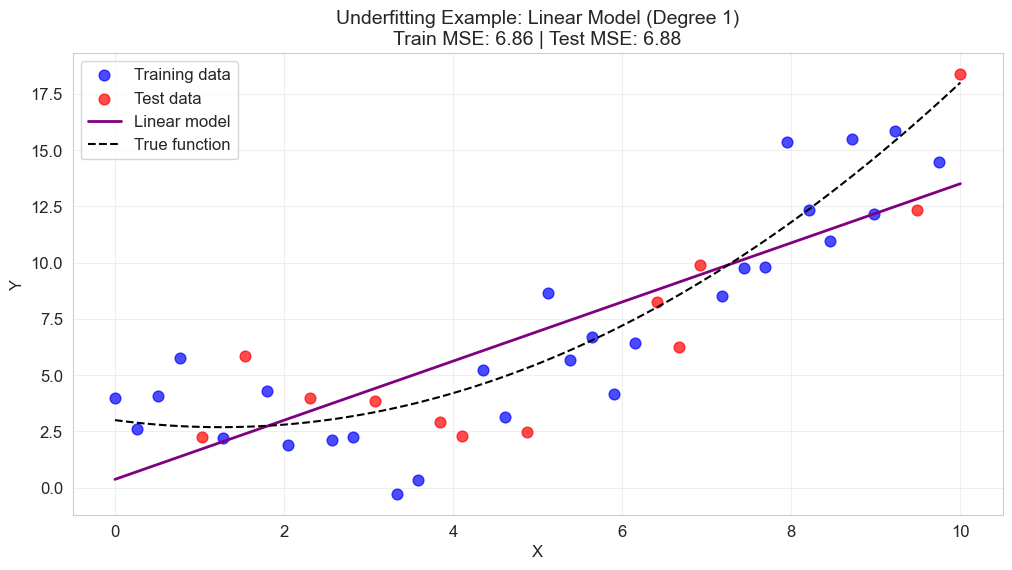

Linear model (Underfitting):
  - Training MSE: 6.86
  - Test MSE: 6.88

Observations about underfitting:
1. The model is too simple (straight line) to capture the curved relationship in the data
2. Both training and test errors are high
3. The model has high bias (systematically misses the true pattern)


In [14]:
# Create and fit a linear model (degree 1 polynomial)
linear_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
linear_model.fit(X_train, y_train)

# Generate predictions on a smooth grid for visualization
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_plot_linear = linear_model.predict(X_plot)

# Calculate errors
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)
train_mse_linear = mean_squared_error(y_train, y_train_pred_linear)
test_mse_linear = mean_squared_error(y_test, y_test_pred_linear)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', s=60, alpha=0.7, label='Training data')
plt.scatter(X_test, y_test, color='red', s=60, alpha=0.7, label='Test data')
plt.plot(X_plot, y_plot_linear, color='purple', linewidth=2, label='Linear model')
plt.plot(X_smooth, y_true, 'k--', linewidth=1.5, label='True function')
plt.title(f'Underfitting Example: Linear Model (Degree 1)\nTrain MSE: {train_mse_linear:.2f} | Test MSE: {test_mse_linear:.2f}', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Linear model (Underfitting):\n  - Training MSE: {train_mse_linear:.2f}\n  - Test MSE: {test_mse_linear:.2f}\n")
print("Observations about underfitting:")
print("1. The model is too simple (straight line) to capture the curved relationship in the data")
print("2. Both training and test errors are high")
print("3. The model has high bias (systematically misses the true pattern)")

## 6. Encontrando um Bom Ajuste

Um **bom ajuste** ocorre quando a complexidade do modelo corresponde ao padrão subjacente dos dados. Como nossos dados seguem uma relação quadrática, um polinômio de grau 2 deve fornecer um bom ajuste.

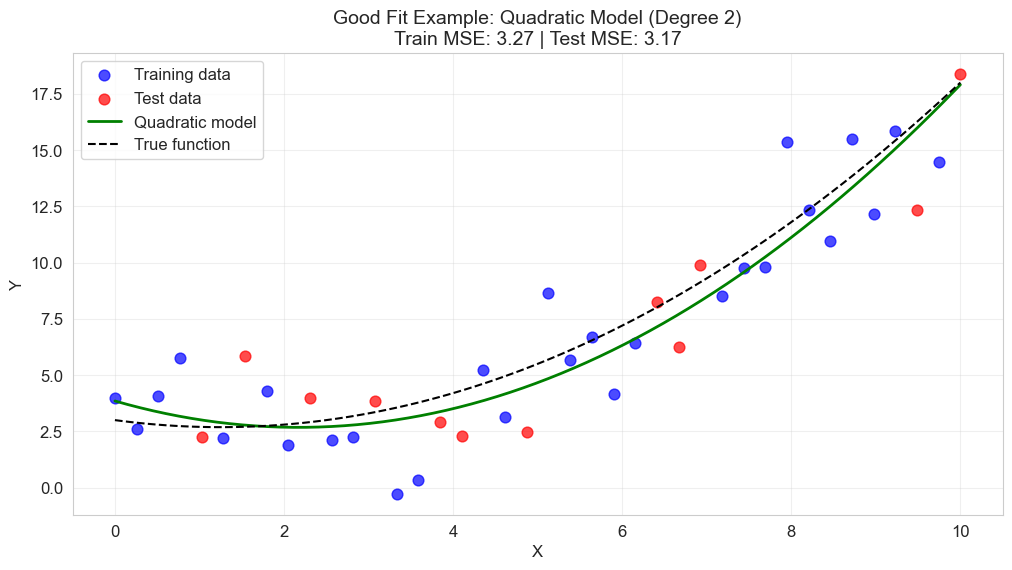

Quadratic model (Good Fit):
  - Training MSE: 3.27
  - Test MSE: 3.17

Observations about good fit:
1. The model complexity matches the underlying data pattern
2. Both training and test errors are relatively low
3. Training and test errors are similar, indicating good generalization


In [15]:
# Create and fit a quadratic model (degree 2 polynomial)
quadratic_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
quadratic_model.fit(X_train, y_train)

# Generate predictions
y_plot_quadratic = quadratic_model.predict(X_plot)

# Calculate errors
y_train_pred_quadratic = quadratic_model.predict(X_train)
y_test_pred_quadratic = quadratic_model.predict(X_test)
train_mse_quadratic = mean_squared_error(y_train, y_train_pred_quadratic)
test_mse_quadratic = mean_squared_error(y_test, y_test_pred_quadratic)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', s=60, alpha=0.7, label='Training data')
plt.scatter(X_test, y_test, color='red', s=60, alpha=0.7, label='Test data')
plt.plot(X_plot, y_plot_quadratic, color='green', linewidth=2, label='Quadratic model')
plt.plot(X_smooth, y_true, 'k--', linewidth=1.5, label='True function')
plt.title(f'Good Fit Example: Quadratic Model (Degree 2)\nTrain MSE: {train_mse_quadratic:.2f} | Test MSE: {test_mse_quadratic:.2f}', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Quadratic model (Good Fit):\n  - Training MSE: {train_mse_quadratic:.2f}\n  - Test MSE: {test_mse_quadratic:.2f}\n")
print("Observations about good fit:")
print("1. The model complexity matches the underlying data pattern")
print("2. Both training and test errors are relatively low")
print("3. Training and test errors are similar, indicating good generalization")

## 7. Explorando o Overfitting

**Overfitting** acontece quando nosso modelo é muito complexo e começa a se ajustar ao ruído nos dados de treinamento em vez de apenas ao padrão subjacente. Vamos ver isso com um polinômio de alto grau.

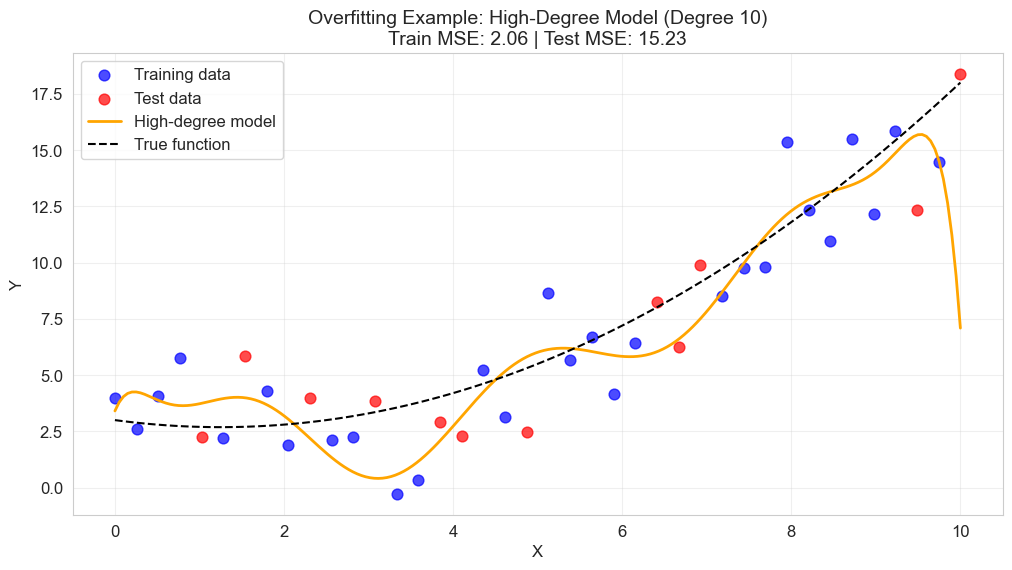

High-degree model (Overfitting):
  - Training MSE: 2.06
  - Test MSE: 15.23

Observations about overfitting:
1. The model is too complex and fits the noise in the training data
2. Training error is very low, but test error is high
3. The model has high variance (sensitive to fluctuations in the training data)


In [16]:
# Create and fit a high-degree polynomial model (degree 10)
complex_model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
complex_model.fit(X_train, y_train)

# Generate predictions
y_plot_complex = complex_model.predict(X_plot)

# Calculate errors
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)
train_mse_complex = mean_squared_error(y_train, y_train_pred_complex)
test_mse_complex = mean_squared_error(y_test, y_test_pred_complex)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', s=60, alpha=0.7, label='Training data')
plt.scatter(X_test, y_test, color='red', s=60, alpha=0.7, label='Test data')
plt.plot(X_plot, y_plot_complex, color='orange', linewidth=2, label='High-degree model')
plt.plot(X_smooth, y_true, 'k--', linewidth=1.5, label='True function')
plt.title(f'Overfitting Example: High-Degree Model (Degree 10)\nTrain MSE: {train_mse_complex:.2f} | Test MSE: {test_mse_complex:.2f}', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"High-degree model (Overfitting):\n  - Training MSE: {train_mse_complex:.2f}\n  - Test MSE: {test_mse_complex:.2f}\n")
print("Observations about overfitting:")
print("1. The model is too complex and fits the noise in the training data")
print("2. Training error is very low, but test error is high")
print("3. The model has high variance (sensitive to fluctuations in the training data)")

## 8. Comparando Todos os Modelos

Vamos comparar os três modelos lado a lado para ver claramente as diferenças em seus ajustes e métricas de desempenho.

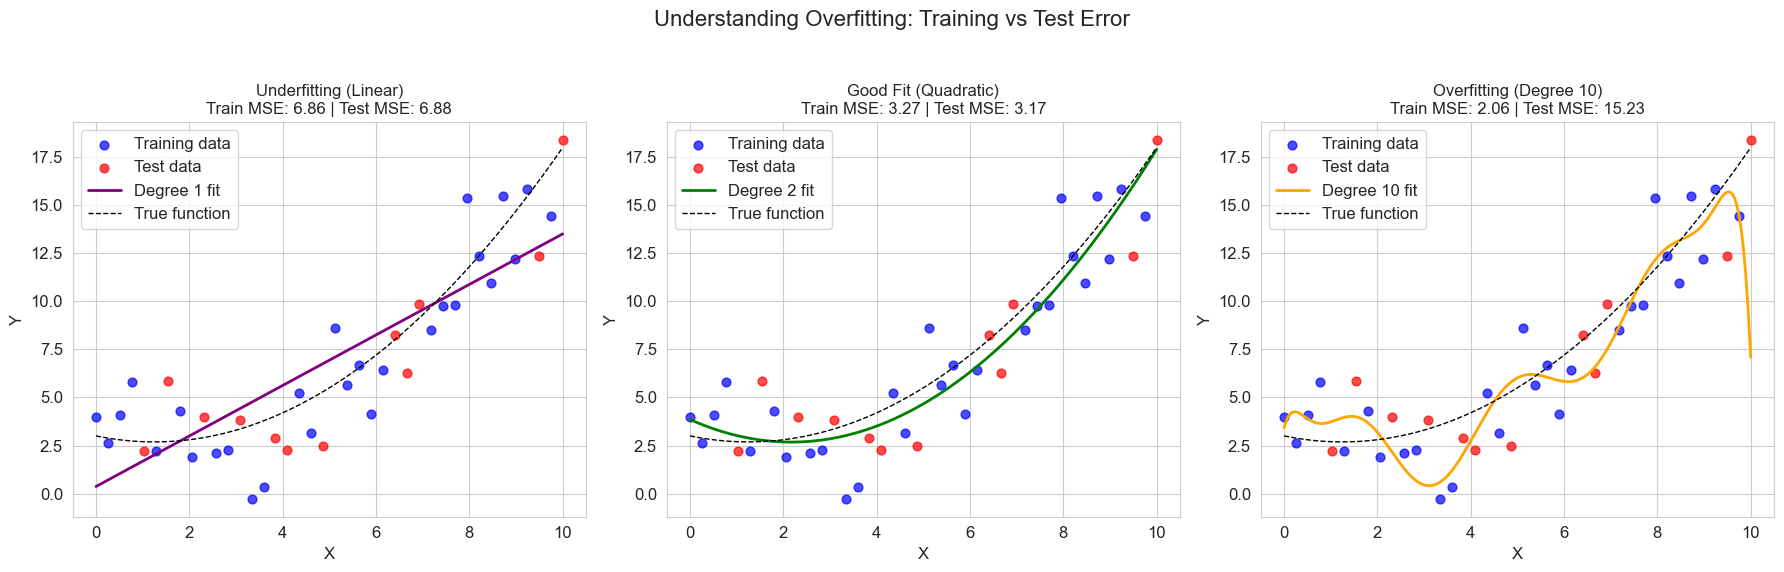

In [17]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Understanding Overfitting: Training vs Test Error', fontsize=16)

def fit_and_evaluate(degree, ax, color, title):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Generate a smooth curve for predictions
    X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    # Compute Mean Squared Error for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot training and test data along with the model prediction
    ax.scatter(X_train, y_train, color='blue', s=40, alpha=0.7, label='Training data')
    ax.scatter(X_test, y_test, color='red', s=40, alpha=0.7, label='Test data')
    ax.plot(X_plot, y_plot, color=color, lw=2, label=f'Degree {degree} fit')
    ax.plot(X_smooth, y_true, 'k--', linewidth=1, label='True function')
    ax.set_title(f'{title}\nTrain MSE: {train_mse:.2f} | Test MSE: {test_mse:.2f}', fontsize=12)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    return train_mse, test_mse

results = []
results.append(fit_and_evaluate(1, ax1, 'purple', 'Underfitting (Linear)'))
results.append(fit_and_evaluate(2, ax2, 'green', 'Good Fit (Quadratic)'))
results.append(fit_and_evaluate(10, ax3, 'orange', 'Overfitting (Degree 10)'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 9. Análise do Desempenho do Modelo

Vamos analisar as métricas de desempenho de cada modelo e entender o que elas nos dizem sobre underfitting e overfitting.

In [18]:
# Print detailed analysis
print("Detailed Analysis of Model Performance:")
print("\nModel Type      Training MSE    Test MSE       Overfitting Ratio")
print("-" * 65)
model_names = ["Underfitting", "Good Fit", "Overfitting"]
for i, (train_mse, test_mse) in enumerate(results):
    ratio = test_mse / train_mse if train_mse != 0 else float('inf')
    print(f"{model_names[i]:<15} {train_mse:12.2f} {test_mse:12.2f} {ratio:12.2f}")

print("\nObservations:")
print("1. Underfitting: The model is too simple, leading to higher errors on both training and test data.")
print("2. Good Fit: The quadratic model captures the true trend well, with similar errors on train and test data.")
print("3. Overfitting: The high-degree polynomial (degree 10) fits the noise in the training data more closely,")
print("   resulting in a lower training error but a noticeably higher test error.")
print("A higher overfitting ratio (Test MSE / Training MSE) indicates poorer generalization.")

Detailed Analysis of Model Performance:

Model Type      Training MSE    Test MSE       Overfitting Ratio
-----------------------------------------------------------------
Underfitting            6.86         6.88         1.00
Good Fit                3.27         3.17         0.97
Overfitting             2.06        15.23         7.38

Observations:
1. Underfitting: The model is too simple, leading to higher errors on both training and test data.
2. Good Fit: The quadratic model captures the true trend well, with similar errors on train and test data.
3. Overfitting: The high-degree polynomial (degree 10) fits the noise in the training data more closely,
   resulting in a lower training error but a noticeably higher test error.
A higher overfitting ratio (Test MSE / Training MSE) indicates poorer generalization.


## 10. Visualizando o Bias-variance Tradeoff

O bias-variance trade-off é um conceito fundamental em machine learning:
- **Bias (Viés)**: Erro de suposições excessivamente simplistas (underfitting)
- **Variância**: Erro de sensibilidade a pequenas flutuações nos dados de treinamento (overfitting)

Vamos visualizar como a complexidade do modelo afeta os erros de treinamento e teste:

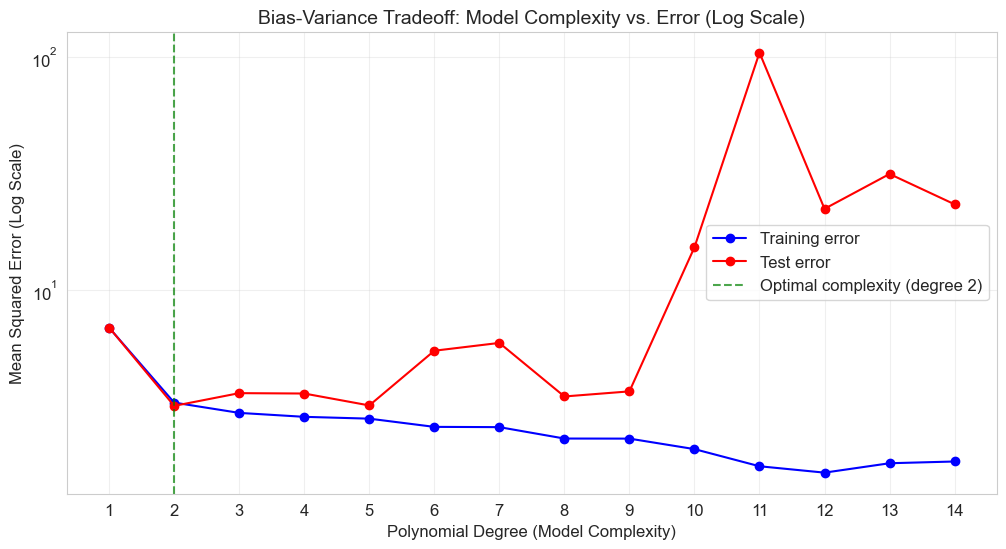

Optimal polynomial degree for this dataset: 2

Bias-Variance Tradeoff Explained:
1. As model complexity increases, training error consistently decreases
2. Test error initially decreases, then increases as overfitting begins
3. The optimal model has the right balance between bias and variance
4. Simpler models have high bias (underfitting)
5. More complex models have high variance (overfitting)


In [ ]:
# Test different polynomial degrees
degrees = range(1, 15)
train_errors = []
test_errors = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the learning curve
plt.figure(figsize=(12, 6))

# plt.semilogy creates a plot with a logarithmic scale on the y-axis
# This is useful for visualizing data that spans multiple orders of magnitude
plt.semilogy(degrees, train_errors, 'o-', color='blue', label='Training error')
plt.semilogy(degrees, test_errors, 'o-', color='red', label='Test error')

# Mark the optimal complexity
optimal_degree = np.argmin(test_errors) + 1
plt.axvline(x=optimal_degree, color='green', linestyle='--', alpha=0.7, 
            label=f'Optimal complexity (degree {optimal_degree})')

plt.title('Bias-Variance Tradeoff: Model Complexity vs. Error (Log Scale)', fontsize=14)
plt.xlabel('Polynomial Degree (Model Complexity)', fontsize=12)
plt.ylabel('Mean Squared Error (Log Scale)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(degrees)
plt.show()

print(f"Optimal polynomial degree for this dataset: {optimal_degree}")
print("\nBias-Variance Tradeoff Explained:")
print("1. As model complexity increases, training error consistently decreases")
print("2. Test error initially decreases, then increases as overfitting begins")
print("3. The optimal model has the right balance between bias and variance")
print("4. Simpler models have high bias (underfitting)")
print("5. More complex models have high variance (overfitting)")

## 11. Aplicação a Dados Financeiros

Os conceitos de overfitting e underfitting são particularmente importantes ao trabalhar com dados financeiros, onde o ruído pode facilmente enganar os modelos. Vamos discutir como esses conceitos se aplicam à previsão do mercado de ações:

### Considerações para Modelagem de Dados Financeiros

1. **Trade-offs de Complexidade do Modelo**:
   - Modelos muito simples (como regressão linear com poucas features) podem perder padrões importantes do mercado
   - Modelos muito complexos podem se ajustar ao ruído histórico que não prevê movimentos futuros
   
2. **Sintomas Comuns de Overfitting em Modelos Financeiros**:
   - Backtests históricos perfeitos, mas desempenho futuro fraco
   - Sensibilidade excessiva a eventos históricos específicos
   - Modelos que só funcionam em condições específicas de mercado
   
3. **Prevenindo Overfitting em Modelos Financeiros**:
   - Usar validação cruzada baseada em tempo (treinar com dados mais antigos, testar com dados mais recentes)
   - Limitar o número de features àquelas com justificativa econômica
   - Aplicar técnicas de regularização (como regularização L1/L2)
   - Ser cético com modelos que apresentam resultados de backtest bons demais para ser verdade
   - Testar modelos em diferentes regimes de mercado

## 12. Principais Aprendizados e Conclusão

1. **Entendendo os Três Cenários de Ajuste**:
   - Underfitting: Modelo muito simples, erro alto de treinamento e teste
   - Bom ajuste: Complexidade adequada, erro baixo e similar de treinamento e teste
   - Overfitting: Modelo muito complexo, erro baixo de treinamento mas alto de teste

2. **Detectando Problemas de Ajuste**:
   - Usar divisão treino-teste para avaliar generalização
   - Monitorar a diferença entre desempenho de treinamento e teste
   - Calcular a taxa de overfitting (erro de teste / erro de treinamento)

3. **Encontrando a Complexidade Certa do Modelo**:
   - Experimentar com diferentes complexidades de modelo
   - Escolher o modelo que minimiza o erro de teste
   - Lembrar que modelos mais simples geralmente generalizam melhor (Navalha de Occam)

4. **Estratégias Práticas para Prevenir Overfitting**:
   - Coletar mais dados de treinamento
   - Usar técnicas de regularização
   - Simplificar o modelo
   - Usar validação cruzada
   - Parada antecipada durante o treinamento

Com esses princípios em mente, você estará melhor preparado para construir modelos que não apenas se ajustem bem aos dados históricos, mas também façam previsões precisas em dados novos e não vistos—o objetivo final de qualquer modelo de machine learning.